In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

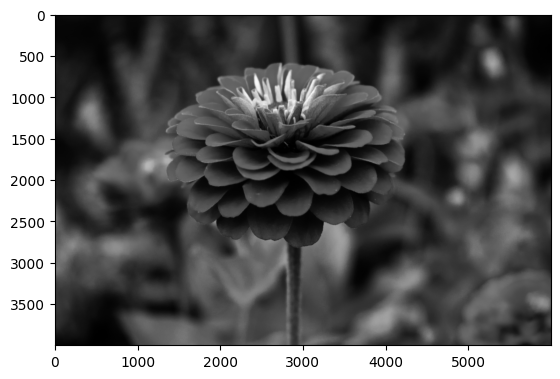

In [21]:
image = cv2.imread('img.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")
plt.show()

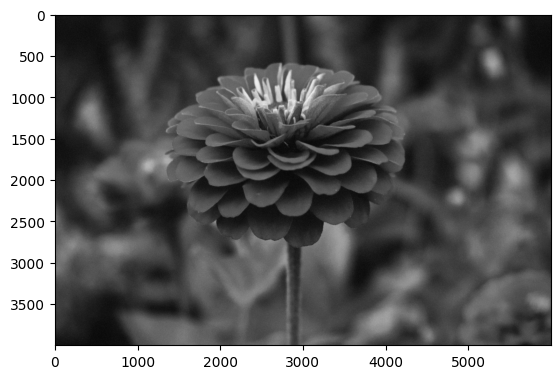

In [22]:
mean = 0
stddev = 30
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image_gray,noise_gauss)
plt.imshow(image_noise_gauss, cmap = "gray")

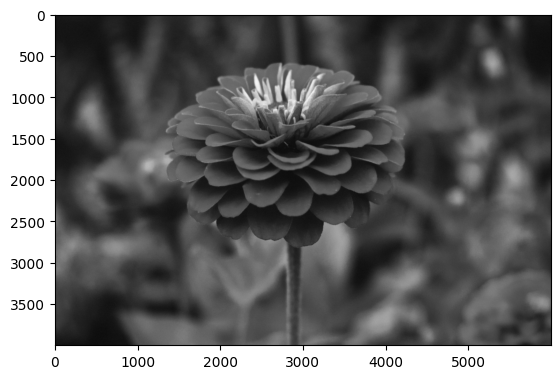

In [23]:
uniform_noise = np.random.randint(0, 30, image_gray.shape).astype("uint8")
image_noise_uniform = cv2.add(image_gray, uniform_noise)
plt.imshow(image_noise_uniform, cmap = "gray")

1: Cредних h=20, MSE 148.08830395833334, SSM 0.7978572921918047
2: Билатериальный (15,100,100), MSE 148.46491266666666, SSM 0.7929716020997939
3: Билатериальный (9,75,75), MSE 146.44105741666667, SSM 0.7696190437726524
4: Медианный (5x5), MSE 49.52617608333333, SSM 0.744433585127402
5: Гаусcа (5x5), MSE 173.82660766666666, SSM 0.6802238862533344
6: Медианный (3x3), MSE 88.19291908333334, SSM 0.6022704580839315
7: Гаусcа (3x3), MSE 191.96810579166666, SSM 0.5900275109536671
8: Cредних h=10, MSE 254.19628470833334, SSM 0.4384312537974775


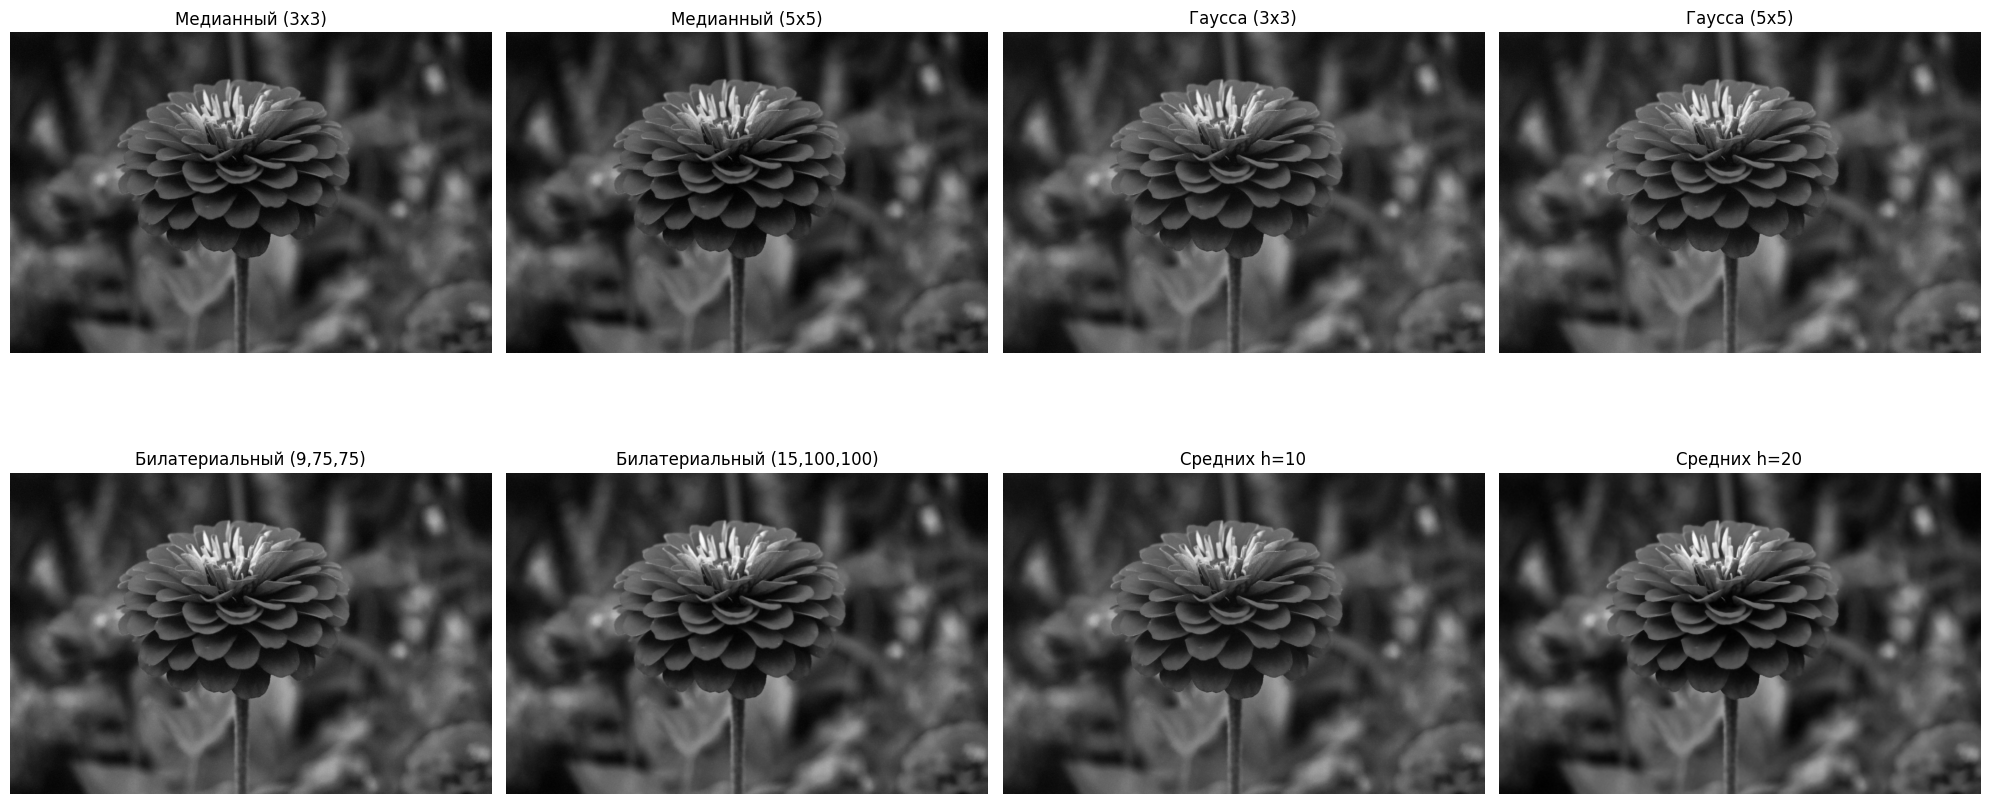

Оптимальный фильтр с учётом пикселей и структуры: Медианный (5x5)


In [24]:
from skimage.metrics import structural_similarity, mean_squared_error

image_gauss_median3 = cv2.medianBlur(image_noise_gauss, 3)
image_gauss_median5 = cv2.medianBlur(image_noise_gauss, 5)
image_gauss_gauss33 = cv2.GaussianBlur(image_noise_gauss,(3,3),0)
image_gauss_gauss55 = cv2.GaussianBlur(image_noise_gauss,(5,5),0)
image_gauss_bilat9 = cv2.bilateralFilter(image_noise_gauss,9,75,75)
image_gauss_bilat15 = cv2.bilateralFilter(image_noise_gauss,15,100,100)
image_gauss_fastNl10 = cv2.fastNlMeansDenoising(image_noise_gauss, h=10, templateWindowSize=7)
image_gauss_fastNl20 = cv2.fastNlMeansDenoising(image_noise_gauss, h=20, templateWindowSize=7)

images = {'Медианный (3x3)': image_gauss_median3, 'Медианный (5x5)': image_gauss_median5
          , 'Гаусcа (3x3)': image_gauss_gauss33, 'Гаусcа (5x5)': image_gauss_gauss55
          , 'Билатериальный (9,75,75)': image_gauss_bilat9, 'Билатериальный (15,100,100)': image_gauss_bilat15
          , 'Cредних h=10': image_gauss_fastNl10, 'Cредних h=20': image_gauss_fastNl20}

def get_res(filter) -> list:
    mse_sp_median = mean_squared_error(image_gray, filter)
    (ssim_sp_median, diff) = structural_similarity(image_gray, filter, full=True)
    return [mse_sp_median, ssim_sp_median]

images_place = sorted(((k, get_res(v)) for k, v in images.items()), key=lambda x: x[1][1], reverse=True)

for i, k in enumerate(images_place, 1):
    print(f'{i}: {k[0]}, MSE {k[1][0]}, SSM {k[1][1]}')

plt.figure(figsize=(20, 10))
for i, (k,v) in enumerate(images.items()):
    plt.subplot(2, 4, i+1)
    plt.imshow(v,  cmap='gray')
    plt.title(k)
    plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Оптимальный фильтр с учётом пикселей и структуры: Медианный (5x5)")


1: Cредних h=10, MSE 221.27014666666668, SSM 0.7930518952142346
2: Гаусcа (5x5), MSE 223.55107216666667, SSM 0.7849699539444158
3: Cредних h=20, MSE 222.70681879166668, SSM 0.781412006485541
4: Билатериальный (15,100,100), MSE 223.44950033333333, SSM 0.7793504031133531
5: Билатериальный (9,75,75), MSE 223.38100025, SSM 0.7778289205728711
6: Гаусcа (3x3), MSE 226.580764875, SSM 0.7697102019676184
7: Медианный (5x5), MSE 229.85354816666666, SSM 0.7255245755534834
8: Медианный (3x3), MSE 237.15757625, SSM 0.6775731538803882


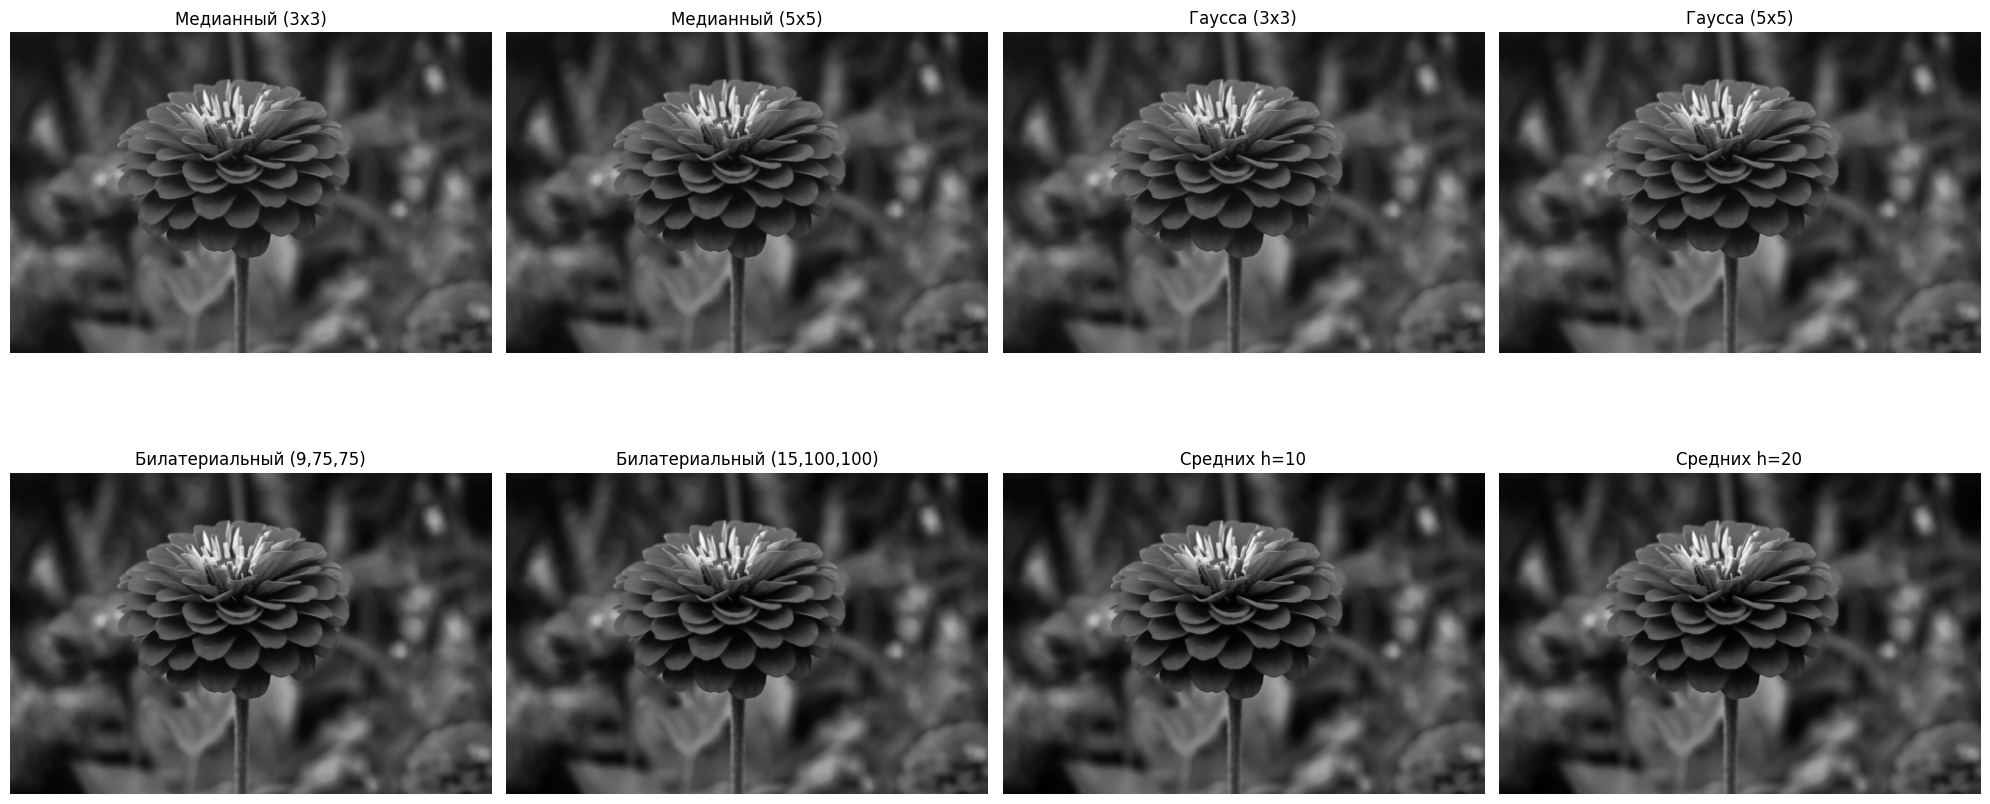

Оптимальный фильтр с учётом пикселей и структуры: Средних h=10


In [25]:
from skimage.metrics import structural_similarity, mean_squared_error

image_gauss_median3 = cv2.medianBlur(image_noise_uniform, 3)
image_gauss_median5 = cv2.medianBlur(image_noise_uniform, 5)
image_gauss_gauss33 = cv2.GaussianBlur(image_noise_uniform,(3,3),0)
image_gauss_gauss55 = cv2.GaussianBlur(image_noise_uniform,(5,5),0)
image_gauss_bilat9 = cv2.bilateralFilter(image_noise_uniform,9,75,75)
image_gauss_bilat15 = cv2.bilateralFilter(image_noise_uniform,15,100,100)
image_gauss_fastNl10 = cv2.fastNlMeansDenoising(image_noise_uniform, h=10, templateWindowSize=7)
image_gauss_fastNl20 = cv2.fastNlMeansDenoising(image_noise_uniform, h=20, templateWindowSize=7)

images = {'Медианный (3x3)': image_gauss_median3, 'Медианный (5x5)': image_gauss_median5
          , 'Гаусcа (3x3)': image_gauss_gauss33, 'Гаусcа (5x5)': image_gauss_gauss55
          , 'Билатериальный (9,75,75)': image_gauss_bilat9, 'Билатериальный (15,100,100)': image_gauss_bilat15
          , 'Cредних h=10': image_gauss_fastNl10, 'Cредних h=20': image_gauss_fastNl20}

def get_res(filter) -> list:
    mse_sp_median = mean_squared_error(image_gray, filter)
    (ssim_sp_median, diff) = structural_similarity(image_gray, filter, full=True)
    return [mse_sp_median, ssim_sp_median]
images_place = sorted(((k, get_res(v)) for k, v in images.items()), key=lambda x: x[1][1], reverse=True)

for i, k in enumerate(images_place, 1):
    print(f'{i}: {k[0]}, MSE {k[1][0]}, SSM {k[1][1]}')

plt.figure(figsize=(20, 10))
for i, (k,v) in enumerate(images.items()):
    plt.subplot(2, 4, i+1)
    plt.imshow(v,  cmap='gray')
    plt.title(k)
    plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Оптимальный фильтр с учётом пикселей и структуры: Средних h=10")